# credit  card  

In [1]:
# import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [2]:
# Load the dataset
df=pd.read_csv('/content/creditcardmarketing-bbm1.csv')

In [3]:
df.head()

,Customer_Number,Offer_Accepted,Income_Level,Bank_Accounts_Open,Overdraft_Protection,Credit_Rating,Credit_Cards_Held,Homes_Owned,Household_Size,Own_Your_Home,Average_Balance
0,1,0,1,1,0,1,2,1,4,0,1160.75
1,2,0,2,1,0,2,2,2,5,1,147.25
2,3,0,1,2,0,2,2,1,2,1,276.50
3,4,0,2,2,0,1,1,1,4,0,1219.00
4,5,0,2,1,0,2,2,1,6,1,1211.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_Number       18000 non-null  int64  
 1   Offer_Accepted        18000 non-null  int64  
 2   Income_Level          18000 non-null  int64  
 3   Bank_Accounts_Open    18000 non-null  int64  
 4   Overdraft_Protection  18000 non-null  int64  
 5   Credit_Rating         18000 non-null  int64  
 6   Credit_Cards_Held     18000 non-null  int64  
 7   Homes_Owned           18000 non-null  int64  
 8   Household_Size        18000 non-null  int64  
 9   Own_Your_Home         18000 non-null  int64  
 10  Average_Balance       18000 non-null  float64
dtypes: float64(1), int64(10)
memory usage: 1.5 MB


In [5]:
df.isnull().sum()

Customer_Number         0
Offer_Accepted          0
Income_Level            0
Bank_Accounts_Open      0
Overdraft_Protection    0
Credit_Rating           0
Credit_Cards_Held       0
Homes_Owned             0
Household_Size          0
Own_Your_Home           0
Average_Balance         0
dtype: int64

In [6]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
17995    False
17996    False
17997    False
17998    False
17999    False
Length: 18000, dtype: bool

In [7]:
df.duplicated().sum()

0

In [8]:
df.shape

(18000, 11)

In [9]:
# assume 'Offer_Accepted'is the column want to predict(e.g. wheather a costomer accepted the credit card)
X=df.drop(['Offer_Accepted'],axis=1) # Feature
y=df['Offer_Accepted'] # Target variable

In [10]:
# Split the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42)

In [11]:
y_train.shape

(14400,)

In [12]:
y_test.shape

(3600,)

In [13]:
# initialize the decision tree classifier
model=DecisionTreeClassifier(random_state=42)

In [14]:
# train the model
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [15]:
model.score(X_train,y_train)

1.0

In [16]:
model.score(X_test,y_test)

0.8886111111111111

In [17]:
# Make predictions on the test set
pridictions=model.predict(X_test)

In [18]:
pridictions

array([0, 0, 0, ..., 0, 0, 0])

In [19]:
from sklearn import tree

In [20]:
text_Representation=tree.export_text(model)
print(text_Representation)

|--- feature_4 <= 2.50
|   |--- feature_4 <= 1.50
|   |   |--- feature_1 <= 2.50
|   |   |   |--- feature_0 <= 1596.00
|   |   |   |   |--- feature_0 <= 1594.00
|   |   |   |   |   |--- feature_9 <= 196.75
|   |   |   |   |   |   |--- feature_9 <= 190.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_9 >  190.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_9 >  196.75
|   |   |   |   |   |   |--- feature_6 <= 1.50
|   |   |   |   |   |   |   |--- feature_9 <= 946.88
|   |   |   |   |   |   |   |   |--- feature_7 <= 2.50
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 546.50
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= 378.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- feature_0 >  378.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- feature_0 >  546.50
|   |   |   |   |   |   |   |   |   |   |---

[Text(0.459790180513252, 0.9868421052631579, 'x[4] <= 2.5\ngini = 0.106\nsamples = 14400\nvalue = [13590, 810]\nclass = 0'),
 Text(0.19375698582610903, 0.9605263157894737, 'x[4] <= 1.5\ngini = 0.063\nsamples = 9670\nvalue = [9353, 317]\nclass = 0'),
 Text(0.08081910301760405, 0.9342105263157895, 'x[1] <= 2.5\ngini = 0.04\nsamples = 4891\nvalue = [4790, 101]\nclass = 0'),
 Text(0.02376076567877143, 0.9078947368421053, 'x[0] <= 1596.0\ngini = 0.032\nsamples = 3647\nvalue = [3588, 59]\nclass = 0'),
 Text(0.006631379896902765, 0.881578947368421, 'x[0] <= 1594.0\ngini = 0.07\nsamples = 305\nvalue = [294, 11]\nclass = 0'),
 Text(0.0056489532455097635, 0.8552631578947368, 'x[9] <= 196.75\ngini = 0.064\nsamples = 304\nvalue = [294, 10]\nclass = 0'),
 Text(0.0036840999427237586, 0.8289473684210527, 'x[9] <= 190.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = 0'),
 Text(0.0027016732913307563, 0.8026315789473685, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = 0'),
 Text(0.004666526594116

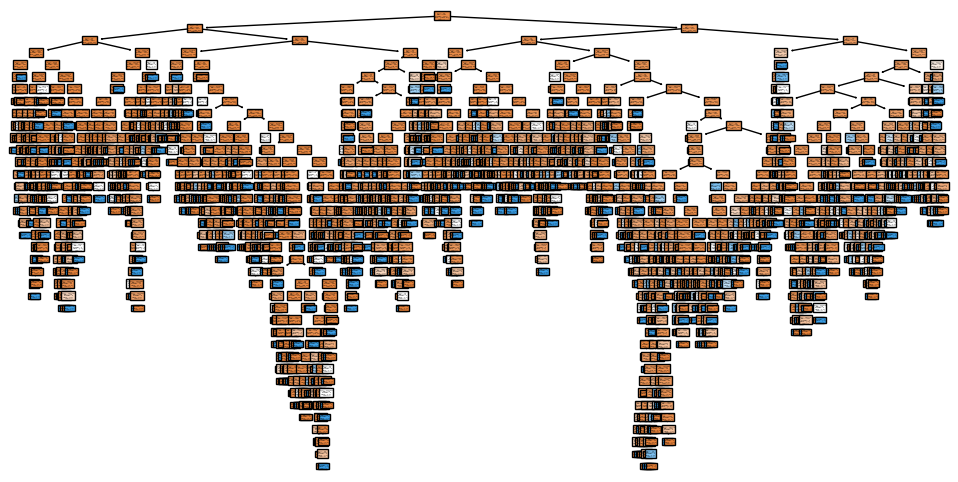

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
tree.plot_tree(model,class_names=['0','1'],filled=True)

In [22]:
con_matrix=confusion_matrix(y_test,pridictions)
print('Confusion matrix:\n',con_matrix)

Confusion matrix:
 [[3181  206]
 [ 195   18]]


In [23]:
# evaluate the model
accuracy=accuracy_score(y_test,pridictions)
classification_report=classification_report(y_test,pridictions)

print(f'Accuracy:{(accuracy)}')
print(f'Classification_Report:\n{classification_report}')

Accuracy:0.8886111111111111
Classification_Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3387
           1       0.08      0.08      0.08       213

    accuracy                           0.89      3600
   macro avg       0.51      0.51      0.51      3600
weighted avg       0.89      0.89      0.89      3600

